In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

In [2]:
leatherworking_df=pd.read_csv('leatherworking.csv')

In [3]:
leatherworking_df

datetime          id  quantity  unit_price  time_left  \
0        2023-12-22 18:41:00  1884706646      1500        5.02       LONG   
1        2023-12-22 18:41:00  1878341738         5       16.83       LONG   
2        2023-12-22 18:41:00  1878341753         5       16.83       LONG   
3        2023-12-22 18:41:00  1878342716         5       16.82       LONG   
4        2023-12-22 18:41:00  1878342751         5        5.50       LONG   
...                      ...         ...       ...         ...        ...   
1826825  2024-01-03 15:41:00  1929453434         1      300.00  VERY_LONG   
1826826  2024-01-03 15:41:00  1929452008       212     5000.00  VERY_LONG   
1826827  2024-01-03 15:41:00  1929451985         1     9199.49  VERY_LONG   
1826828  2024-01-03 15:41:00  1929427155        52       20.00  VERY_LONG   
1826829  2024-01-03 15:41:00  1933193241         1     6088.78       LONG   

         item.id            item.name   item.class  
0         190315        Rousing Earth  Trade Goods  
1         190328        Rousing Frost  Trade Goods  
2         190328        Rousing Frost  Trade Goods  
3         190328        Rousing Frost  Trade Goods  
4         190315        Rousing Earth  Trade Goods  
...          ...                  ...          ...  
1826825   208212     Dreaming Essence  Trade Goods  
1826826   193211    Resilient Leather  Trade Goods  
1826827   204464  Shadowflame Essence  Trade Goods  
1826828   190328        Rousing Frost  Trade Goods  
1826829   204464  Shadowflame Essence  Trade Goods  

[1826830 rows x 8 columns]

In [4]:
leatherworking_df=leatherworking_df.set_index('datetime')

In [5]:
grouped_lw_df=leatherworking_df.groupby(['datetime','item.id']).min()

In [6]:
grouped_lw_df.head(30)

id  quantity  unit_price time_left  \
datetime            item.id                                               
2023-12-22 18:41:00 190315   1876601366         1        5.00      LONG   
                    190316   1876607291         1       57.82      LONG   
                    190320   1876672851         1        6.52      LONG   
                    190321   1876672225         1       64.75      LONG   
                    190328   1876708881         1       15.63      LONG   
                    190329   1876629949         1      154.98      LONG   
                    190330   1876826469         1       34.00      LONG   
                    190331   1876960430         1      375.85      LONG   
                    193211   1876604595         1        0.95      LONG   
                    193215   1876596454         1        0.88      LONG   
                    193218   1876810557         1       24.00      LONG   
                    193228   1879172741         2      219.00      LONG   
                    193231   1876700213         1      125.00      LONG   
                    193244   1877897283         1      750.11      LONG   
                    193254   1879084395         1       64.35      LONG   
                    193255   1876597201         1       19.50      LONG   
                    193554   1877762018         1      749.99      LONG   
                    193555   1878227417         1     4468.00      LONG   
                    194864   1876596287         1      258.97      LONG   
                    201400   1876667825         1        2.00      LONG   
                    201403   1879093556         1       23.50      LONG   
                    204464   1876588949         1     2400.00      LONG   
                    204710   1877248543         1     4000.97      LONG   
                    208189   1877378230         1     7000.00      LONG   
                    208212   1876628276         1      193.03      LONG   
                    210456   1876834689         1     4949.95      LONG   
2023-12-22 19:41:00 190315   1876769739         1        4.91      LONG   
                    190316   1876766917         1       57.69      LONG   
                    190320   1876824961         1        5.00      LONG   
                    190321   1876836217         1       64.84      LONG   

                                                    item.name   item.class  
datetime            item.id                                                 
2023-12-22 18:41:00 190315                      Rousing Earth  Trade Goods  
                    190316                     Awakened Earth  Trade Goods  
                    190320                       Rousing Fire  Trade Goods  
                    190321                      Awakened Fire  Trade Goods  
                    190328                      Rousing Frost  Trade Goods  
                    190329                     Awakened Frost  Trade Goods  
                    190330                      Rousing Decay  Trade Goods  
                    190331                     Awakened Decay  Trade Goods  
                    193211                  Resilient Leather  Trade Goods  
                    193215                     Adamant Scales  Trade Goods  
                    193218                         Dense Hide  Trade Goods  
                    193228                    Stonecrust Hide  Trade Goods  
                    193231                     Mireslush Hide  Trade Goods  
                    193244                  Earthshine Scales  Trade Goods  
                    193254                   Rockfang Leather  Trade Goods  
                    193255              Pristine Vorquin Horn  Trade Goods  
                    193554                    Fang Adornments  Trade Goods  
                    193555               Toxified Armor Patch  Trade Goods  
                    194864                   Runed Writhebark  Trade Goods  
                   

In [7]:
reset_lw_df=grouped_lw_df.reset_index()
reset_lw_df

datetime  item.id          id  quantity  unit_price  \
0     2023-12-22 18:41:00   190315  1876601366         1        5.00   
1     2023-12-22 18:41:00   190316  1876607291         1       57.82   
2     2023-12-22 18:41:00   190320  1876672851         1        6.52   
3     2023-12-22 18:41:00   190321  1876672225         1       64.75   
4     2023-12-22 18:41:00   190328  1876708881         1       15.63   
...                   ...      ...         ...       ...         ...   
7405  2024-01-03 15:41:00   204464  1924832127         1     6088.78   
7406  2024-01-03 15:41:00   204710  1926732146         1     8350.90   
7407  2024-01-03 15:41:00   208189  1924845345         1     4275.00   
7408  2024-01-03 15:41:00   208212  1924541164         1      150.98   
7409  2024-01-03 15:41:00   210456  1924782574         1     4468.00   

     time_left                         item.name   item.class  
0         LONG                     Rousing Earth  Trade Goods  
1         LONG                    Awakened Earth  Trade Goods  
2         LONG                      Rousing Fire  Trade Goods  
3         LONG                     Awakened Fire  Trade Goods  
4         LONG                     Rousing Frost  Trade Goods  
...        ...                               ...          ...  
7405      LONG               Shadowflame Essence  Trade Goods  
7406      LONG  Shadowflame-Tempered Armor Patch  Trade Goods  
7407      LONG                   Verdant Conduit  Trade Goods  
7408      LONG                  Dreaming Essence  Trade Goods  
7409      LONG          Dreaming Antler Fragment  Trade Goods  

[7410 rows x 8 columns]

In [8]:
reset_lw_df=reset_lw_df.set_index('datetime')

In [9]:
toxified_patch_price_list=reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193555]
toxified_patch_price_list

datetime
2023-12-22 18:41:00    4468.0
2023-12-22 19:41:00    4468.0
2023-12-22 20:41:00    4468.0
2023-12-22 21:41:00    4468.0
2023-12-22 22:41:00    4468.0
                        ...  
2024-01-03 11:41:00    4220.0
2024-01-03 12:41:00    4220.0
2024-01-03 13:41:00    4220.0
2024-01-03 14:41:00    4220.0
2024-01-03 15:41:00    4220.0
Name: unit_price, Length: 285, dtype: float64

In [10]:
toxified_patch_material_price=(reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==190331]*8+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193215]*60+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193228]*2)
toxified_patch_material_price

datetime
2023-12-22 18:41:00    3497.60
2023-12-22 19:41:00    3452.20
2023-12-22 20:41:00    3379.04
2023-12-22 21:41:00    3302.56
2023-12-22 22:41:00    3212.20
                        ...   
2024-01-03 11:41:00    3767.94
2024-01-03 12:41:00    3868.22
2024-01-03 13:41:00    3868.30
2024-01-03 14:41:00    3916.22
2024-01-03 15:41:00    3764.94
Name: unit_price, Length: 285, dtype: float64

In [11]:
toxified_patch_df=pd.DataFrame(toxified_patch_price_list)
toxified_patch_df

unit_price
datetime                       
2023-12-22 18:41:00      4468.0
2023-12-22 19:41:00      4468.0
2023-12-22 20:41:00      4468.0
2023-12-22 21:41:00      4468.0
2023-12-22 22:41:00      4468.0
...                         ...
2024-01-03 11:41:00      4220.0
2024-01-03 12:41:00      4220.0
2024-01-03 13:41:00      4220.0
2024-01-03 14:41:00      4220.0
2024-01-03 15:41:00      4220.0

[285 rows x 1 columns]

In [12]:
toxified_patch_df['material_price']=toxified_patch_material_price

In [13]:
toxified_patch_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00      4468.0         3497.60
2023-12-22 19:41:00      4468.0         3452.20
2023-12-22 20:41:00      4468.0         3379.04
2023-12-22 21:41:00      4468.0         3302.56
2023-12-22 22:41:00      4468.0         3212.20
...                         ...             ...
2024-01-03 11:41:00      4220.0         3767.94
2024-01-03 12:41:00      4220.0         3868.22
2024-01-03 13:41:00      4220.0         3868.30
2024-01-03 14:41:00      4220.0         3916.22
2024-01-03 15:41:00      4220.0         3764.94

[285 rows x 2 columns]

Text(0.5, 1.0, 'Comparing Crafted Component to Material Cost')

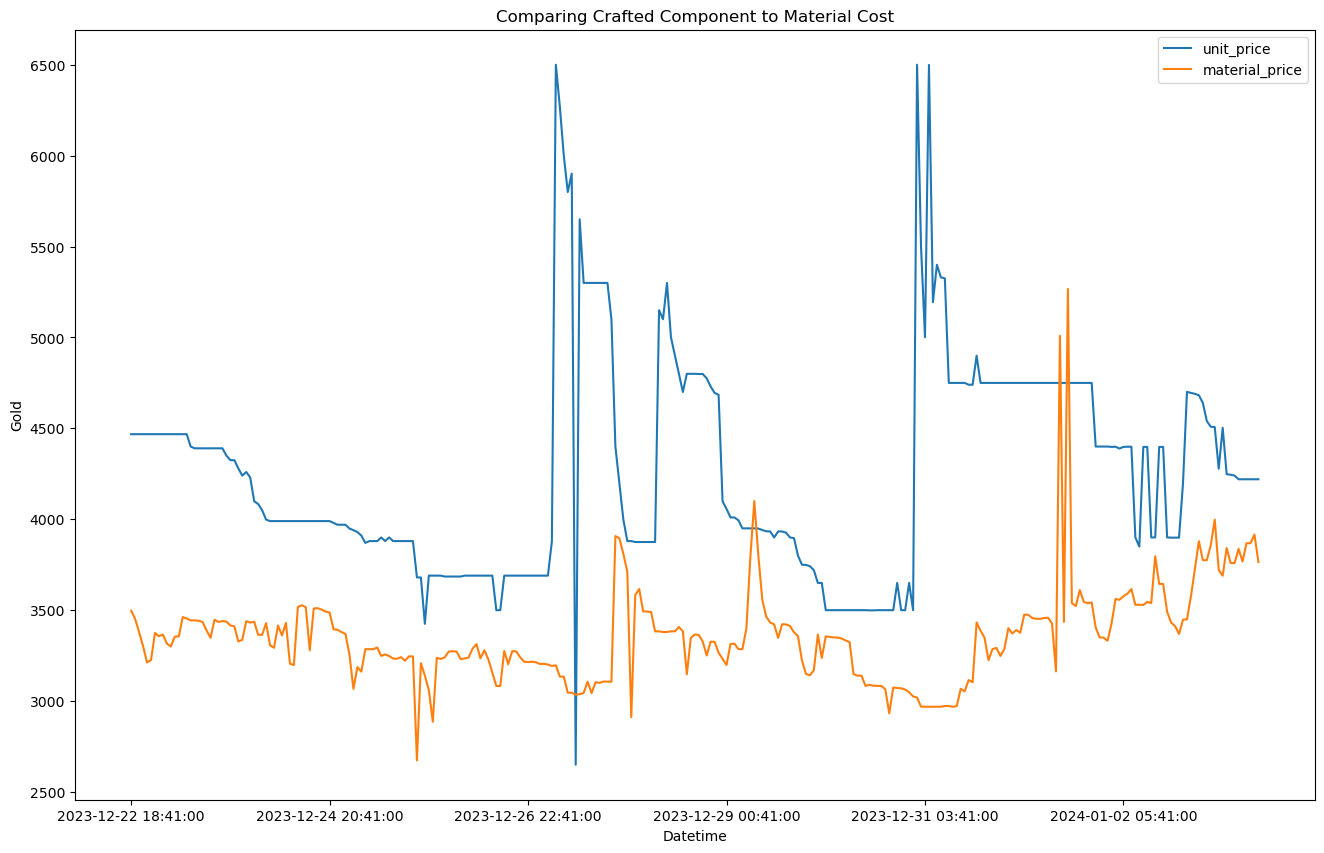

In [14]:
ax=toxified_patch_df.plot(figsize=(14,10))
plt.xlabel("Datetime")
plt.ylabel("Gold")
plt.title("Comparing Crafted Component to Material Cost")

In [15]:
shadowflame_patch_list=reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==204710]

In [16]:
shadowflame_patch_material_price=(reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193254]*2+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193255]*2+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==204464]*1+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==190321]*2+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193211]*150+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193244]*2)

In [17]:
shadowflame_patch_df=pd.DataFrame(shadowflame_patch_list)
shadowflame_patch_df['material_price']=shadowflame_patch_material_price
shadowflame_patch_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00     4000.97         4339.92
2023-12-22 19:41:00     5600.97         3938.59
2023-12-22 20:41:00     5794.96         4168.70
2023-12-22 21:41:00     5794.97         4112.70
2023-12-22 22:41:00     5794.97         4232.51
...                         ...             ...
2024-01-03 11:41:00     8350.90         6598.74
2024-01-03 12:41:00     8350.90         6850.96
2024-01-03 13:41:00     8350.90         7480.92
2024-01-03 14:41:00     8350.90         7370.12
2024-01-03 15:41:00     8350.90         7905.98

[285 rows x 2 columns]

In [18]:
fang_adornments_list=reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193554]
fang_adornments_material_price=(reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193254]*2+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193255]*2+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==201400]*1+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==201403]*1+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193211]*60+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193244]*3)
fang_adornments_df=pd.DataFrame(fang_adornments_list)
fang_adornments_df['material_price']=fang_adornments_material_price
fang_adornments_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00      749.99         2500.53
2023-12-22 19:41:00      749.99         2499.80
2023-12-22 20:41:00      749.99         2407.39
2023-12-22 21:41:00      739.99         2406.90
2023-12-22 22:41:00      739.99         2403.30
...                         ...             ...
2024-01-03 11:41:00      720.00         2317.52
2024-01-03 12:41:00      720.00         2319.52
2024-01-03 13:41:00      720.00         2315.39
2024-01-03 14:41:00      720.00         2316.90
2024-01-03 15:41:00      720.00         2307.32

[285 rows x 2 columns]

In [19]:
verdant_conduit_list=reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==208189]
verdant_conduit_material_price=(reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==208212]*1+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==210456]*1+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==193231]*1+
                                     reset_lw_df['unit_price'].loc[reset_lw_df['item.id']==194864]*1)
verdant_conduit_df=pd.DataFrame(verdant_conduit_list)
verdant_conduit_df['material_price']=verdant_conduit_material_price
verdant_conduit_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00      7000.0         5526.95
2023-12-22 19:41:00      7000.0         5368.92
2023-12-22 20:41:00      7000.0         5524.60
2023-12-22 21:41:00      7000.0         5461.30
2023-12-22 22:41:00      7000.0         5443.74
...                         ...             ...
2024-01-03 11:41:00      4275.0         5155.34
2024-01-03 12:41:00      4275.0         5093.82
2024-01-03 13:41:00      4275.0         5120.12
2024-01-03 14:41:00      4275.0         4988.36
2024-01-03 15:41:00      4275.0         5037.67

[285 rows x 2 columns]

In [20]:
toxified_patch_df['potential_profit']=(toxified_patch_df['unit_price']-toxified_patch_df['material_price'])
toxified_patch_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00      4468.0         3497.60            970.40
2023-12-22 19:41:00      4468.0         3452.20           1015.80
2023-12-22 20:41:00      4468.0         3379.04           1088.96
2023-12-22 21:41:00      4468.0         3302.56           1165.44
2023-12-22 22:41:00      4468.0         3212.20           1255.80
...                         ...             ...               ...
2024-01-03 11:41:00      4220.0         3767.94            452.06
2024-01-03 12:41:00      4220.0         3868.22            351.78
2024-01-03 13:41:00      4220.0         3868.30            351.70
2024-01-03 14:41:00      4220.0         3916.22            303.78
2024-01-03 15:41:00      4220.0         3764.94            455.06

[285 rows x 3 columns]

In [21]:
shadowflame_patch_df['potential_profit']=(shadowflame_patch_df['unit_price']-shadowflame_patch_df['material_price'])
shadowflame_patch_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00     4000.97         4339.92           -338.95
2023-12-22 19:41:00     5600.97         3938.59           1662.38
2023-12-22 20:41:00     5794.96         4168.70           1626.26
2023-12-22 21:41:00     5794.97         4112.70           1682.27
2023-12-22 22:41:00     5794.97         4232.51           1562.46
...                         ...             ...               ...
2024-01-03 11:41:00     8350.90         6598.74           1752.16
2024-01-03 12:41:00     8350.90         6850.96           1499.94
2024-01-03 13:41:00     8350.90         7480.92            869.98
2024-01-03 14:41:00     8350.90         7370.12            980.78
2024-01-03 15:41:00     8350.90         7905.98            444.92

[285 rows x 3 columns]

In [22]:
fang_adornments_df['potential_profit']=(fang_adornments_df['unit_price']-fang_adornments_df['material_price'])
fang_adornments_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00      749.99         2500.53          -1750.54
2023-12-22 19:41:00      749.99         2499.80          -1749.81
2023-12-22 20:41:00      749.99         2407.39          -1657.40
2023-12-22 21:41:00      739.99         2406.90          -1666.91
2023-12-22 22:41:00      739.99         2403.30          -1663.31
...                         ...             ...               ...
2024-01-03 11:41:00      720.00         2317.52          -1597.52
2024-01-03 12:41:00      720.00         2319.52          -1599.52
2024-01-03 13:41:00      720.00         2315.39          -1595.39
2024-01-03 14:41:00      720.00         2316.90          -1596.90
2024-01-03 15:41:00      720.00         2307.32          -1587.32

[285 rows x 3 columns]

In [23]:
verdant_conduit_df['potential_profit']=(verdant_conduit_df['unit_price']-verdant_conduit_df['material_price'])
verdant_conduit_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00      7000.0         5526.95           1473.05
2023-12-22 19:41:00      7000.0         5368.92           1631.08
2023-12-22 20:41:00      7000.0         5524.60           1475.40
2023-12-22 21:41:00      7000.0         5461.30           1538.70
2023-12-22 22:41:00      7000.0         5443.74           1556.26
...                         ...             ...               ...
2024-01-03 11:41:00      4275.0         5155.34           -880.34
2024-01-03 12:41:00      4275.0         5093.82           -818.82
2024-01-03 13:41:00      4275.0         5120.12           -845.12
2024-01-03 14:41:00      4275.0         4988.36           -713.36
2024-01-03 15:41:00      4275.0         5037.67           -762.67

[285 rows x 3 columns]

<Axes: xlabel='datetime'>

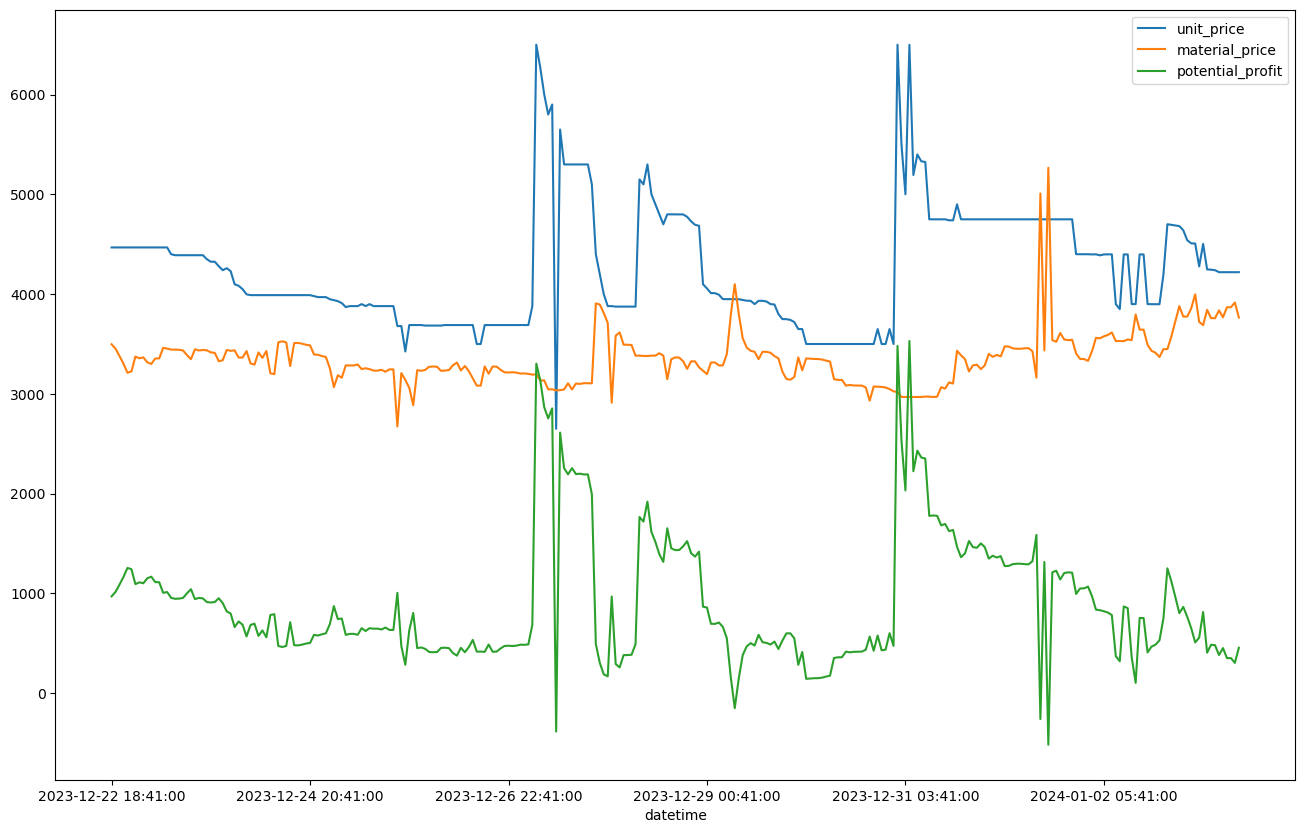

In [24]:
toxified_patch_df.plot(figsize=(16,10))

<Axes: xlabel='datetime'>

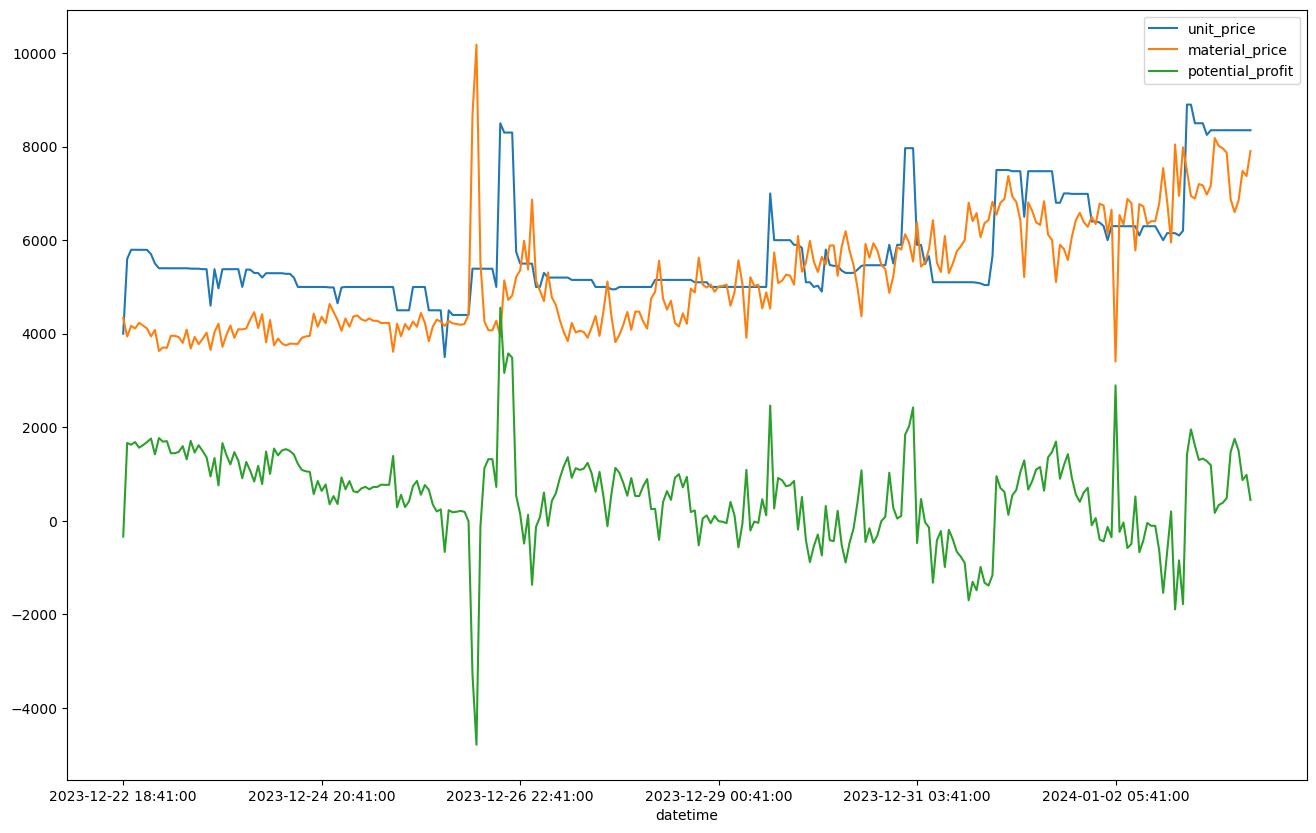

In [25]:
shadowflame_patch_df.plot(figsize=(16,10))

<Axes: xlabel='datetime'>

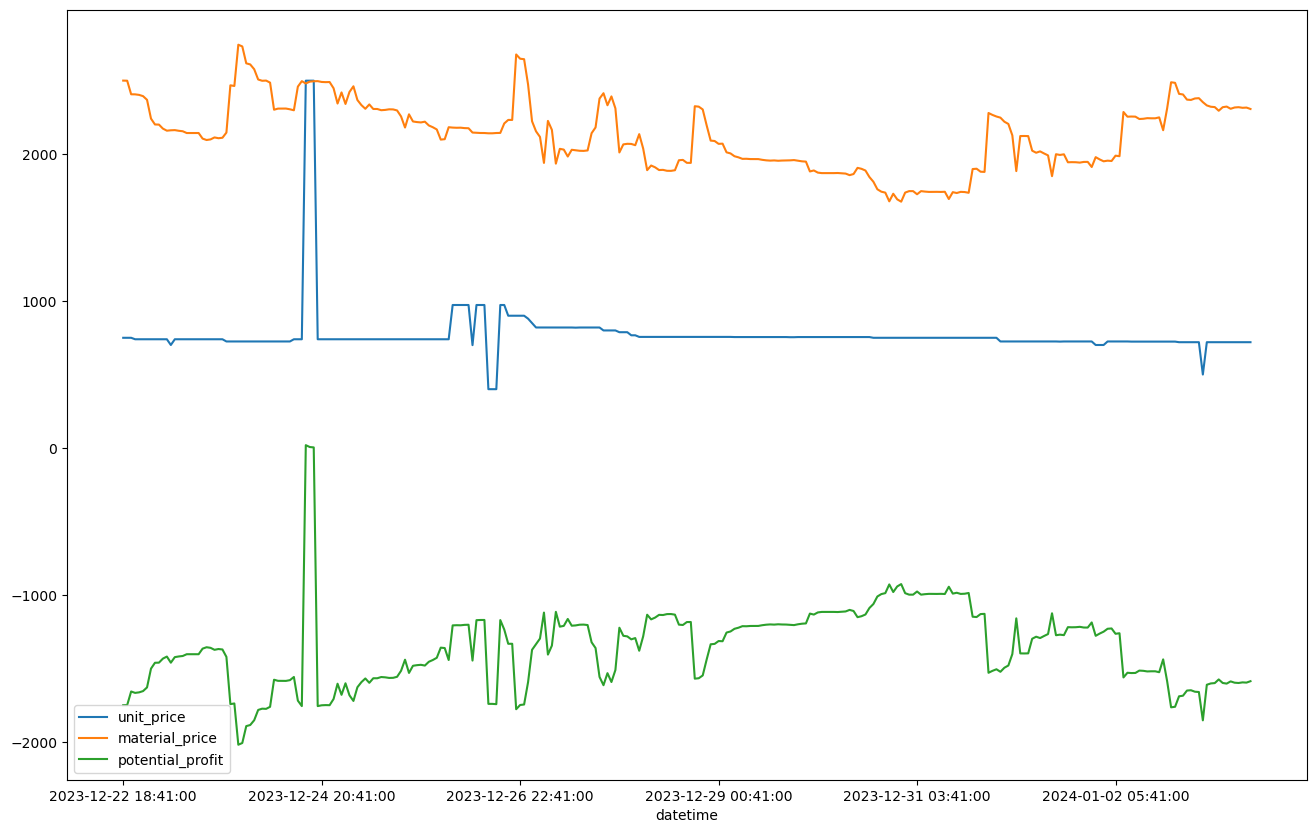

In [26]:
fang_adornments_df.plot(figsize=(16,10))

<Axes: xlabel='datetime'>

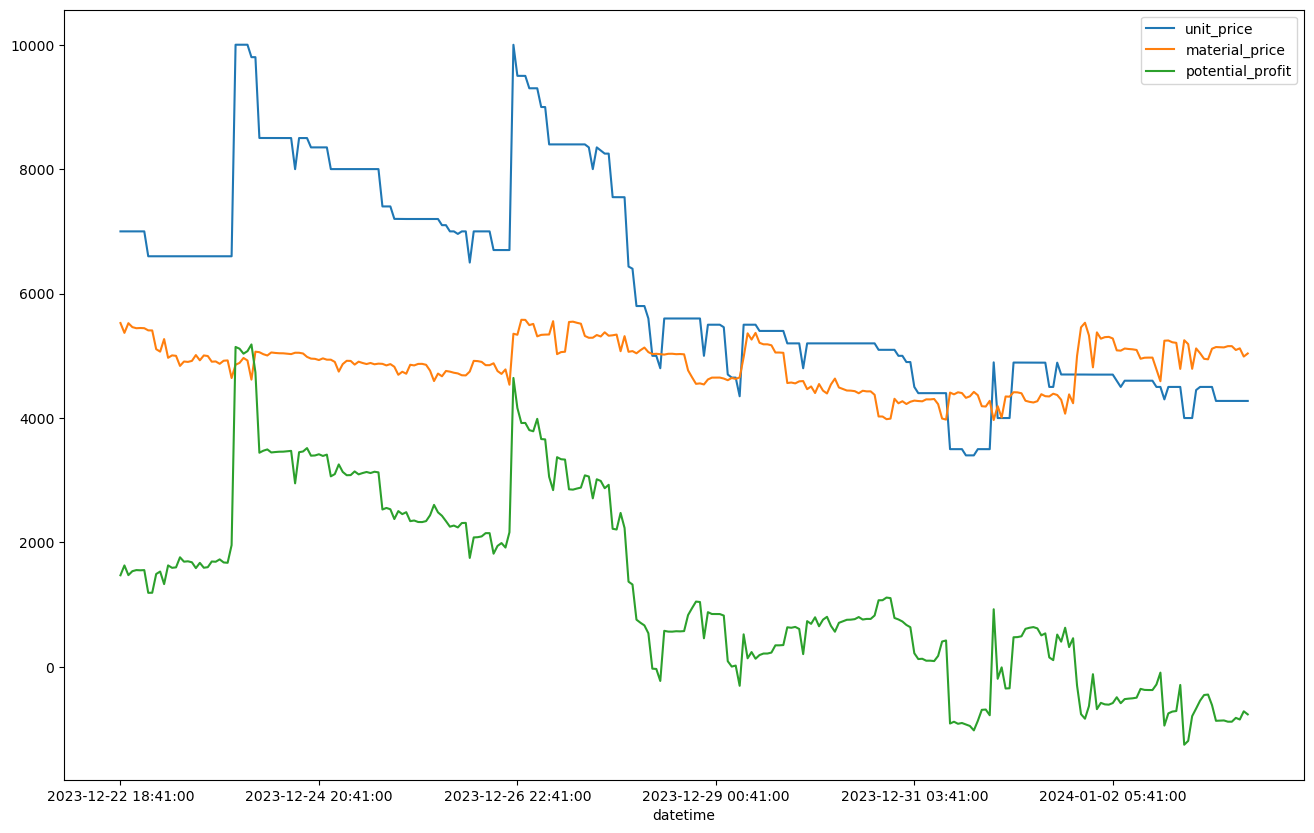

In [27]:
verdant_conduit_df.plot(figsize=(16,10))

In [28]:
leatherworking_profit_dict={"toxified_patch":toxified_patch_df['potential_profit'].mean(),
                            "shadowflame_patch":shadowflame_patch_df['potential_profit'].mean(),
                            "fang_adornment":fang_adornments_df['potential_profit'].mean(),
                            "verdant_conduit":verdant_conduit_df['potential_profit'].mean()}
leatherworking_profit_dict

{'toxified_patch': 899.3850175438596,
 'shadowflame_patch': 526.1476842105263,
 'fang_adornment': -1360.9550175438599,
 'verdant_conduit': 1271.9228421052635}

In [29]:
#toxified_patch_df.to_csv('C:/Users/gc20r/Desktop/python_challenges/Action_House/Auction_House/toxified_patch.csv')